This notebook contains 

- example code for different kinds of visualizations and exploratory data analysis
- example code for sklearn model - KMeans clustering
- example code for timeseries forecast with Prophet library

We will analyze country data from the World Happiness Report that uses data from Gallup World Poll. 

More info at the [data source](https://www.kaggle.com/unsdsn/world-happiness).

In this notebook:
- 2021 Report Analysis
- 2008 - 2020 Analysis
- Clustering similar countries using sklearn
- Forecast using FB Prophet

In [1]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
#this snippet is to display multiple dfs in a row 
from IPython.display import display, HTML
CSS = """
.output {
    flex-direction: row;
}
"""

HTML('<style>{}</style>'.format(CSS))

---------------------------------------------------------------

## Preview of data fields from historical data

In [2]:
hist_data = pd.read_csv("world-happiness-report.csv")
hist_data.head(2)

Country name  year  Life Ladder  Log GDP per capita  Social support  \
0  Afghanistan  2008        3.724                7.37           0.451   
1  Afghanistan  2009        4.402                7.54           0.552   

   Healthy life expectancy at birth  Freedom to make life choices  Generosity  \
0                              50.8                         0.718       0.168   
1                              51.2                         0.679       0.190   

   Perceptions of corruption  Positive affect  Negative affect  
0                      0.882            0.518            0.258  
1                      0.850            0.584            0.237

In [7]:
hist_data.loc[:, ['Country name', 'year']].groupby('Country name').count().mean()

year    11.740964
dtype: float64

In [13]:
stats = {}
stats["N of Countries"] = len(hist_data['Country name'].unique())
stats["First available year"] = int(hist_data.loc[:, 'year'].min())
stats["Last available year"] = int(hist_data.loc[:, 'year'].max())
stats["Min N Years available"] = int(hist_data.loc[:, ['Country name', 'year']].groupby('Country name').count().min())
stats["Max N Years available"] = int(hist_data.loc[:, ['Country name', 'year']].groupby('Country name').count().max())
stats["Median N Years available"] = int(hist_data.loc[:, ['Country name', 'year']].groupby('Country name').count().median())

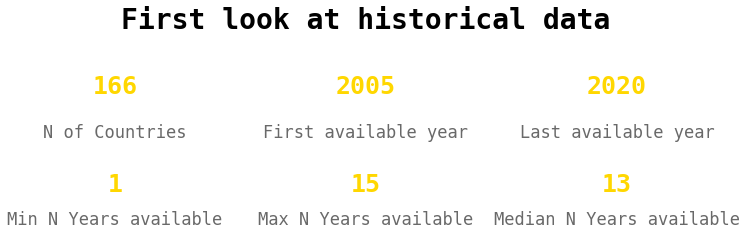

In [22]:
# inspiration code: https://www.kaggle.com/dwin183287/covid-19-world-vaccination
fig=plt.figure(figsize=(3,2),facecolor='white')

ax=fig.add_subplot(1,1,1)
ax.text(1.5,1,"First look at historical data",color='black',fontsize=28, fontweight='bold', fontfamily='monospace',ha='center')

increment = 1.5
position = 0
for c in list(stats.keys())[0:3]:
    ax.text(position,0.4,str(round(stats[c], 2)),color='gold',fontsize=25, fontweight='bold', fontfamily='monospace',ha='center')
    ax.text(position,0.001, c,color='dimgrey',fontsize=17, fontweight='light', fontfamily='monospace',ha='center')
    position += increment
    
increment = 1.5
position = 0
for c in list(stats.keys())[3:6]:
    ax.text(position,-0.5,str(round(stats[c], 2)),color='gold',fontsize=25, fontweight='bold', fontfamily='monospace',ha='center')
    ax.text(position,-0.801, c,color='dimgrey',fontsize=17, fontweight='light', fontfamily='monospace',ha='center')
    position += increment

ax.set_yticklabels('')
ax.tick_params(axis='y',length=0)
ax.tick_params(axis='x',length=0)
ax.set_xticklabels('')

for direction in ['top','right','left','bottom']:
    ax.spines[direction].set_visible(False)


### While have data between the years 2005 and 2020 for 166 countries, not all years are available. The median number of available years is 13.

## Preview of data fields from 2021 data

In [23]:
curr_data = pd.read_csv("world-happiness-report-2021.csv")
curr_data.head(2)

Country name Regional indicator  Ladder score  \
0      Finland     Western Europe         7.842   
1      Denmark     Western Europe         7.620   

   Standard error of ladder score  upperwhisker  lowerwhisker  \
0                           0.032         7.904         7.780   
1                           0.035         7.687         7.552   

   Logged GDP per capita  Social support  Healthy life expectancy  \
0                 10.775           0.954                     72.0   
1                 10.933           0.954                     72.7   

   Freedom to make life choices  Generosity  Perceptions of corruption  \
0                         0.949      -0.098                      0.186   
1                         0.946       0.030                      0.179   

   Ladder score in Dystopia  Explained by: Log GDP per capita  \
0                      2.43                             1.446   
1                      2.43                             1.502   

   Explained by: Social support  Explained by: Healthy life expectancy  \
0                         1.106                                  0.741   
1                         1.108                                  0.763   

   Explained by: Freedom to make life choices  Explained by: Generosity  \
0                                       0.691                     0.124   
1                                       0.686                     0.208   

   Explained by: Perceptions of corruption  Dystopia + residual  
0                                    0.481                3.253  
1                                    0.485                2.868

In [24]:
stats = {}
stats["N of Countries"] = len(curr_data)
stats["Min Score"] = curr_data['Ladder score'].min()
stats["Max Score"] = curr_data['Ladder score'].max()
stats["Median Score"] = curr_data['Ladder score'].median()
stats["Average Score"] = curr_data['Ladder score'].mean()

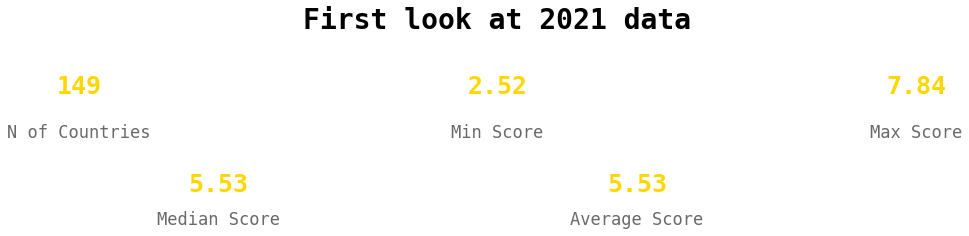

In [28]:
# inspiration code: https://www.kaggle.com/dwin183287/covid-19-world-vaccination
fig=plt.figure(figsize=(5,2),facecolor='white')

ax=fig.add_subplot(1,1,1)
ax.text(1.5,1,"First look at 2021 data",color='black',fontsize=28, fontweight='bold', fontfamily='monospace',ha='center')

increment = 1.5
position = 0
for c in list(stats.keys())[0:3]:
    ax.text(position,0.4,str(round(stats[c], 2)),color='gold',fontsize=25, fontweight='bold', fontfamily='monospace',ha='center')
    ax.text(position,0.001, c,color='dimgrey',fontsize=17, fontweight='light', fontfamily='monospace',ha='center')
    position += increment

increment = 1.5
position = 0.5
for c in list(stats.keys())[3:5]:
    ax.text(position,-0.5,str(round(stats[c], 2)),color='gold',fontsize=25, fontweight='bold', fontfamily='monospace',ha='center')
    ax.text(position,-0.801, c,color='dimgrey',fontsize=17, fontweight='light', fontfamily='monospace',ha='center')
    position += increment
    

ax.set_yticklabels('')
ax.tick_params(axis='y',length=0)
ax.tick_params(axis='x',length=0)
ax.set_xticklabels('')

for direction in ['top','right','left','bottom']:
    ax.spines[direction].set_visible(False)


### In the 2021 report we have data available for 149 countries. The "Ladder" score is created by asking poll respondents to rate their happiness score on a scale from 0 (least happy) to 10 (happiest).

## Top and bottom 5 happiest countries in 2021:

In [29]:
top_5 = curr_data.sort_values("Ladder score", ascending = False).loc[:, ["Country name", "Regional indicator", "Ladder score"]].head(5)
top_5.columns.name = "Top 5 Happiest"
display(top_5)
bottom_5 = curr_data.sort_values("Ladder score").loc[:, ["Country name", "Regional indicator", "Ladder score"]].head(5)
bottom_5.columns.name = "Bottom 5 Happiest"
display(bottom_5)        
        
        

Top 5 Happiest Country name Regional indicator  Ladder score
0                   Finland     Western Europe         7.842
1                   Denmark     Western Europe         7.620
2               Switzerland     Western Europe         7.571
3                   Iceland     Western Europe         7.554
4               Netherlands     Western Europe         7.464

Bottom 5 Happiest Country name  Regional indicator  Ladder score
148                Afghanistan          South Asia         2.523
147                   Zimbabwe  Sub-Saharan Africa         3.145
146                     Rwanda  Sub-Saharan Africa         3.415
145                   Botswana  Sub-Saharan Africa         3.467
144                    Lesotho  Sub-Saharan Africa         3.512

### Top 5 happiest countries are on the left. All of them are located in Western Europe. Least happy on the right. 4 out of 5 are located in Sub-Saharan Africa. The country with the lowest score is Afghanistan.



## Top and bottom 50 happiest countries by region

In [30]:
top_50 = curr_data.sort_values("Ladder score", ascending = False).loc[:, ["Regional indicator", "Ladder score"]].head(50)
t50 = top_50.groupby( "Regional indicator").count().rename(columns = {"Ladder score": "N of Countries"}).sort_values("N of Countries", ascending = False)
t50.columns.name = "Most happy regions"

bottom_50 = curr_data.sort_values("Ladder score", ascending = True).loc[:, ["Regional indicator", "Ladder score"]].head(50)
b50 = bottom_50.groupby( "Regional indicator").count().rename(columns = {"Ladder score": "N of Countries"}).sort_values("N of Countries", ascending = False)
b50.columns.name = "Least happy regions"

display(t50)
display(b50)


Most happy regions                  N of Countries
Regional indicator                                
Western Europe                                  18
Central and Eastern Europe                       9
Latin America and Caribbean                      9
Middle East and North Africa                     5
North America and ANZ                            4
Commonwealth of Independent States               2
East Asia                                        1
Southeast Asia                                   1
Sub-Saharan Africa                               1

Least happy regions                 N of Countries
Regional indicator                                
Sub-Saharan Africa                              27
Middle East and North Africa                    11
South Asia                                       5
Southeast Asia                                   3
Commonwealth of Independent States               2
Latin America and Caribbean                      2

### All of Western, Central, and Eastern Europe countries make it to the top 50. All of Sub-Saharan African countries score in the bottom 50. Later in the analysis we will give a mor in depth view at the distribution of scores by regions.



## Map of 2021 Happiness scores

In [31]:
fig = px.choropleth(curr_data, locations="Country name",
                    color="Ladder score", 
                    locationmode='country names',
                    color_continuous_scale=px.colors.sequential.Plasma)
fig.show()

### Visualizing the scores on a map is validating the idea that happiness scores are correlated to geographical region. We will examine this further.

## 2021 Happiness score distribution by geographical region

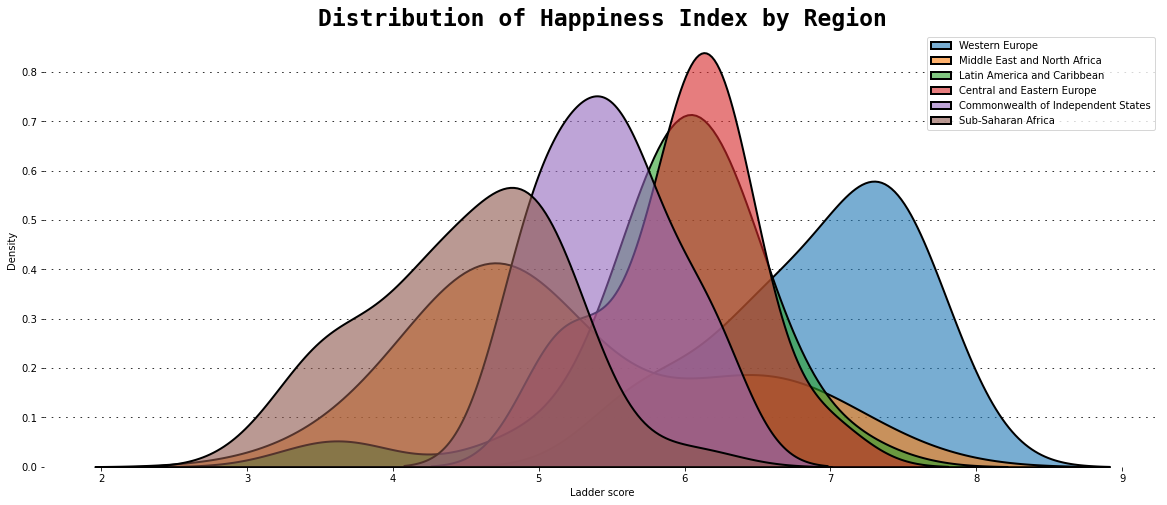

In [32]:
curr_data.rename(columns = {"Regional indicator": "regional_indicator"}, inplace = True)

fig = plt.figure(figsize=(20,8),facecolor='white')
gs=fig.add_gridspec(1,1)
ax=[None for i in range(1)]
ax[0]=fig.add_subplot(gs[0,0])
ax[0].grid(which='both', axis='y', zorder=0, color='black', linestyle=':', dashes=(2,7))
ax[0].set_title('Distribution of Happiness Index by Region',fontsize=23,fontweight='bold', fontfamily='monospace')

for i in curr_data["regional_indicator"].unique():
    
    if len(curr_data.loc[curr_data.regional_indicator == i, "Ladder score"]) > 10:
        sns.kdeplot(x=curr_data.loc[curr_data.regional_indicator == i, "Ladder score"], ax=ax[0],shade=True, alpha=0.6, zorder=3,linewidth=2,edgecolor='black', label = i)

for s in ['top','left','bottom','right']:
    ax[0].spines[s].set_visible(False)
    
plt.legend()
plt.show()

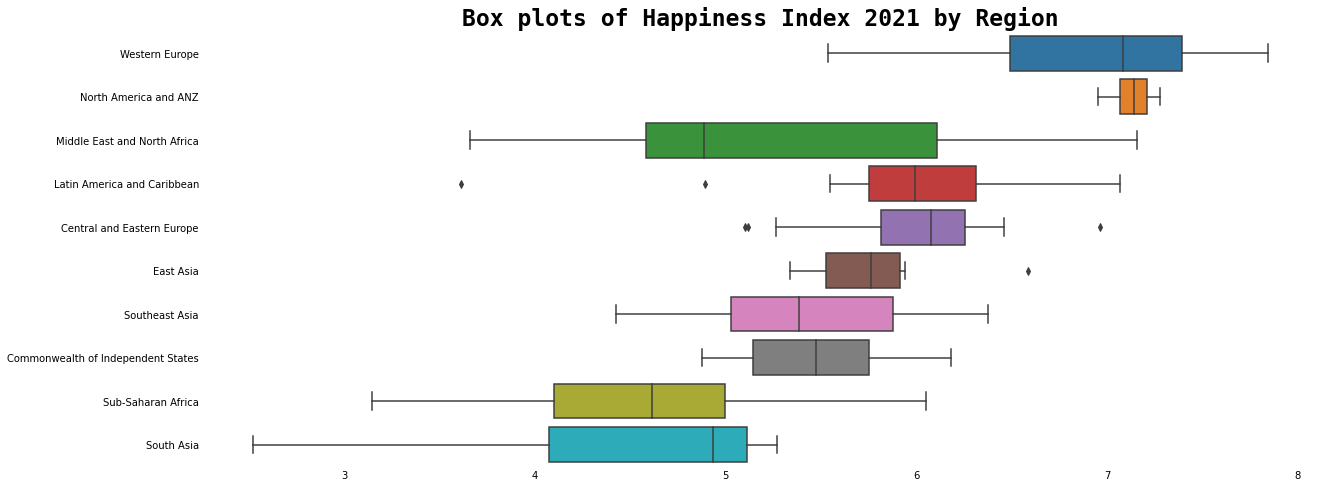

In [33]:
fig, ax = plt.subplots(1,1, figsize=(20,8),facecolor='white')#,dpi=150)
ax = sns.boxplot(y="regional_indicator", x="Ladder score", data=curr_data)#, palette=pal)

for s in ['top','left','bottom','right']:
    ax.spines[s].set_visible(False)
    
ax.set_xlabel("")
ax.set_ylabel("")
ax.tick_params(axis=u'both', which=u'both',length=0)
ax.set_title("Box plots of Happiness Index 2021 by Region",fontsize=23,fontweight='bold', fontfamily='monospace')

plt.show()


### Highlights:
- Western Europe and North America are the only two regions with scores consistently among the happiest countries
- Latin America and Carribbean distribution of scores is also falling among the happiest countries, unless for two outliers
- Middle East and North Africa is the region with the most variance, with countries spanning from the least and the most happy


### Even if the distributions of scores present a high variance, from the visualizations so far, there seems to be a correlation between geographical region and happiness scores

----------------------------------

## What are the most influential factors that explain happiness?

In [34]:
explanatory = "Ladder score"
indicators = ["Logged GDP per capita","Social support","Healthy life expectancy","Freedom to make life choices","Generosity","Perceptions of corruption"]

correlations = {}
for ind in indicators:
    correlations[ind] = np.corrcoef(curr_data[explanatory], curr_data[ind])[0][1]

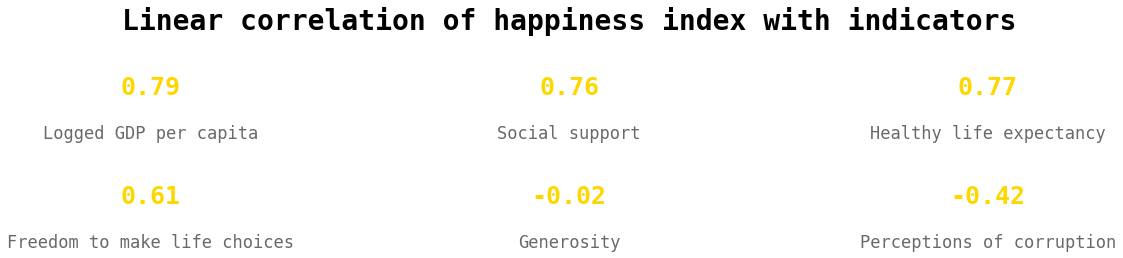

In [35]:
# inspiration code: https://www.kaggle.com/dwin183287/covid-19-world-vaccination
fig=plt.figure(figsize=(5,2),facecolor='white')

ax0=fig.add_subplot(1,1,1)
ax0.text(1.5,1,"Linear correlation of happiness index with indicators",color='black',fontsize=28, fontweight='bold', fontfamily='monospace',ha='center')

increment = 1.5
position = 0
for c in list(correlations.keys())[0:3]:
    ax0.text(position,0.4,str(round(correlations[c], 2)),color='gold',fontsize=25, fontweight='bold', fontfamily='monospace',ha='center')
    ax0.text(position,0.001, c,color='dimgrey',fontsize=17, fontweight='light', fontfamily='monospace',ha='center')
    position += increment
increment = 1.5
position = 0
for c in list(correlations.keys())[3:7]:
    ax0.text(position,-0.6,str(round(correlations[c], 2)),color='gold',fontsize=25, fontweight='bold', fontfamily='monospace',ha='center')
    ax0.text(position,-1.001, c,color='dimgrey',fontsize=17, fontweight='light', fontfamily='monospace',ha='center')
    position += increment

ax0.set_yticklabels('')
ax0.tick_params(axis='y',length=0)
ax0.tick_params(axis='x',length=0)
ax0.set_xticklabels('')

for direction in ['top','right','left','bottom']:
    ax0.spines[direction].set_visible(False)

### There seems to be a clear linear correlation between GDP per capita, social support, life expectancy, freedon to make choices, and happiness scores. We will now visualize the data in a scatter plot to determine whether there might be other non-linear correlations, especially in the case of the generosity indicator and perception of corruption indicators.

In [36]:
cols = ['red', 'yellow', 'purple', 'green', 'blue', 'darkgreen', 'black', 'darkgray', 'magenta', 'silver']

curr_data["region_color"] = 'gray'
i = 0
for key, values in curr_data.groupby("regional_indicator"):
    curr_data.loc[curr_data.regional_indicator == key, "region_color"] = cols[i]
    i += 1
    

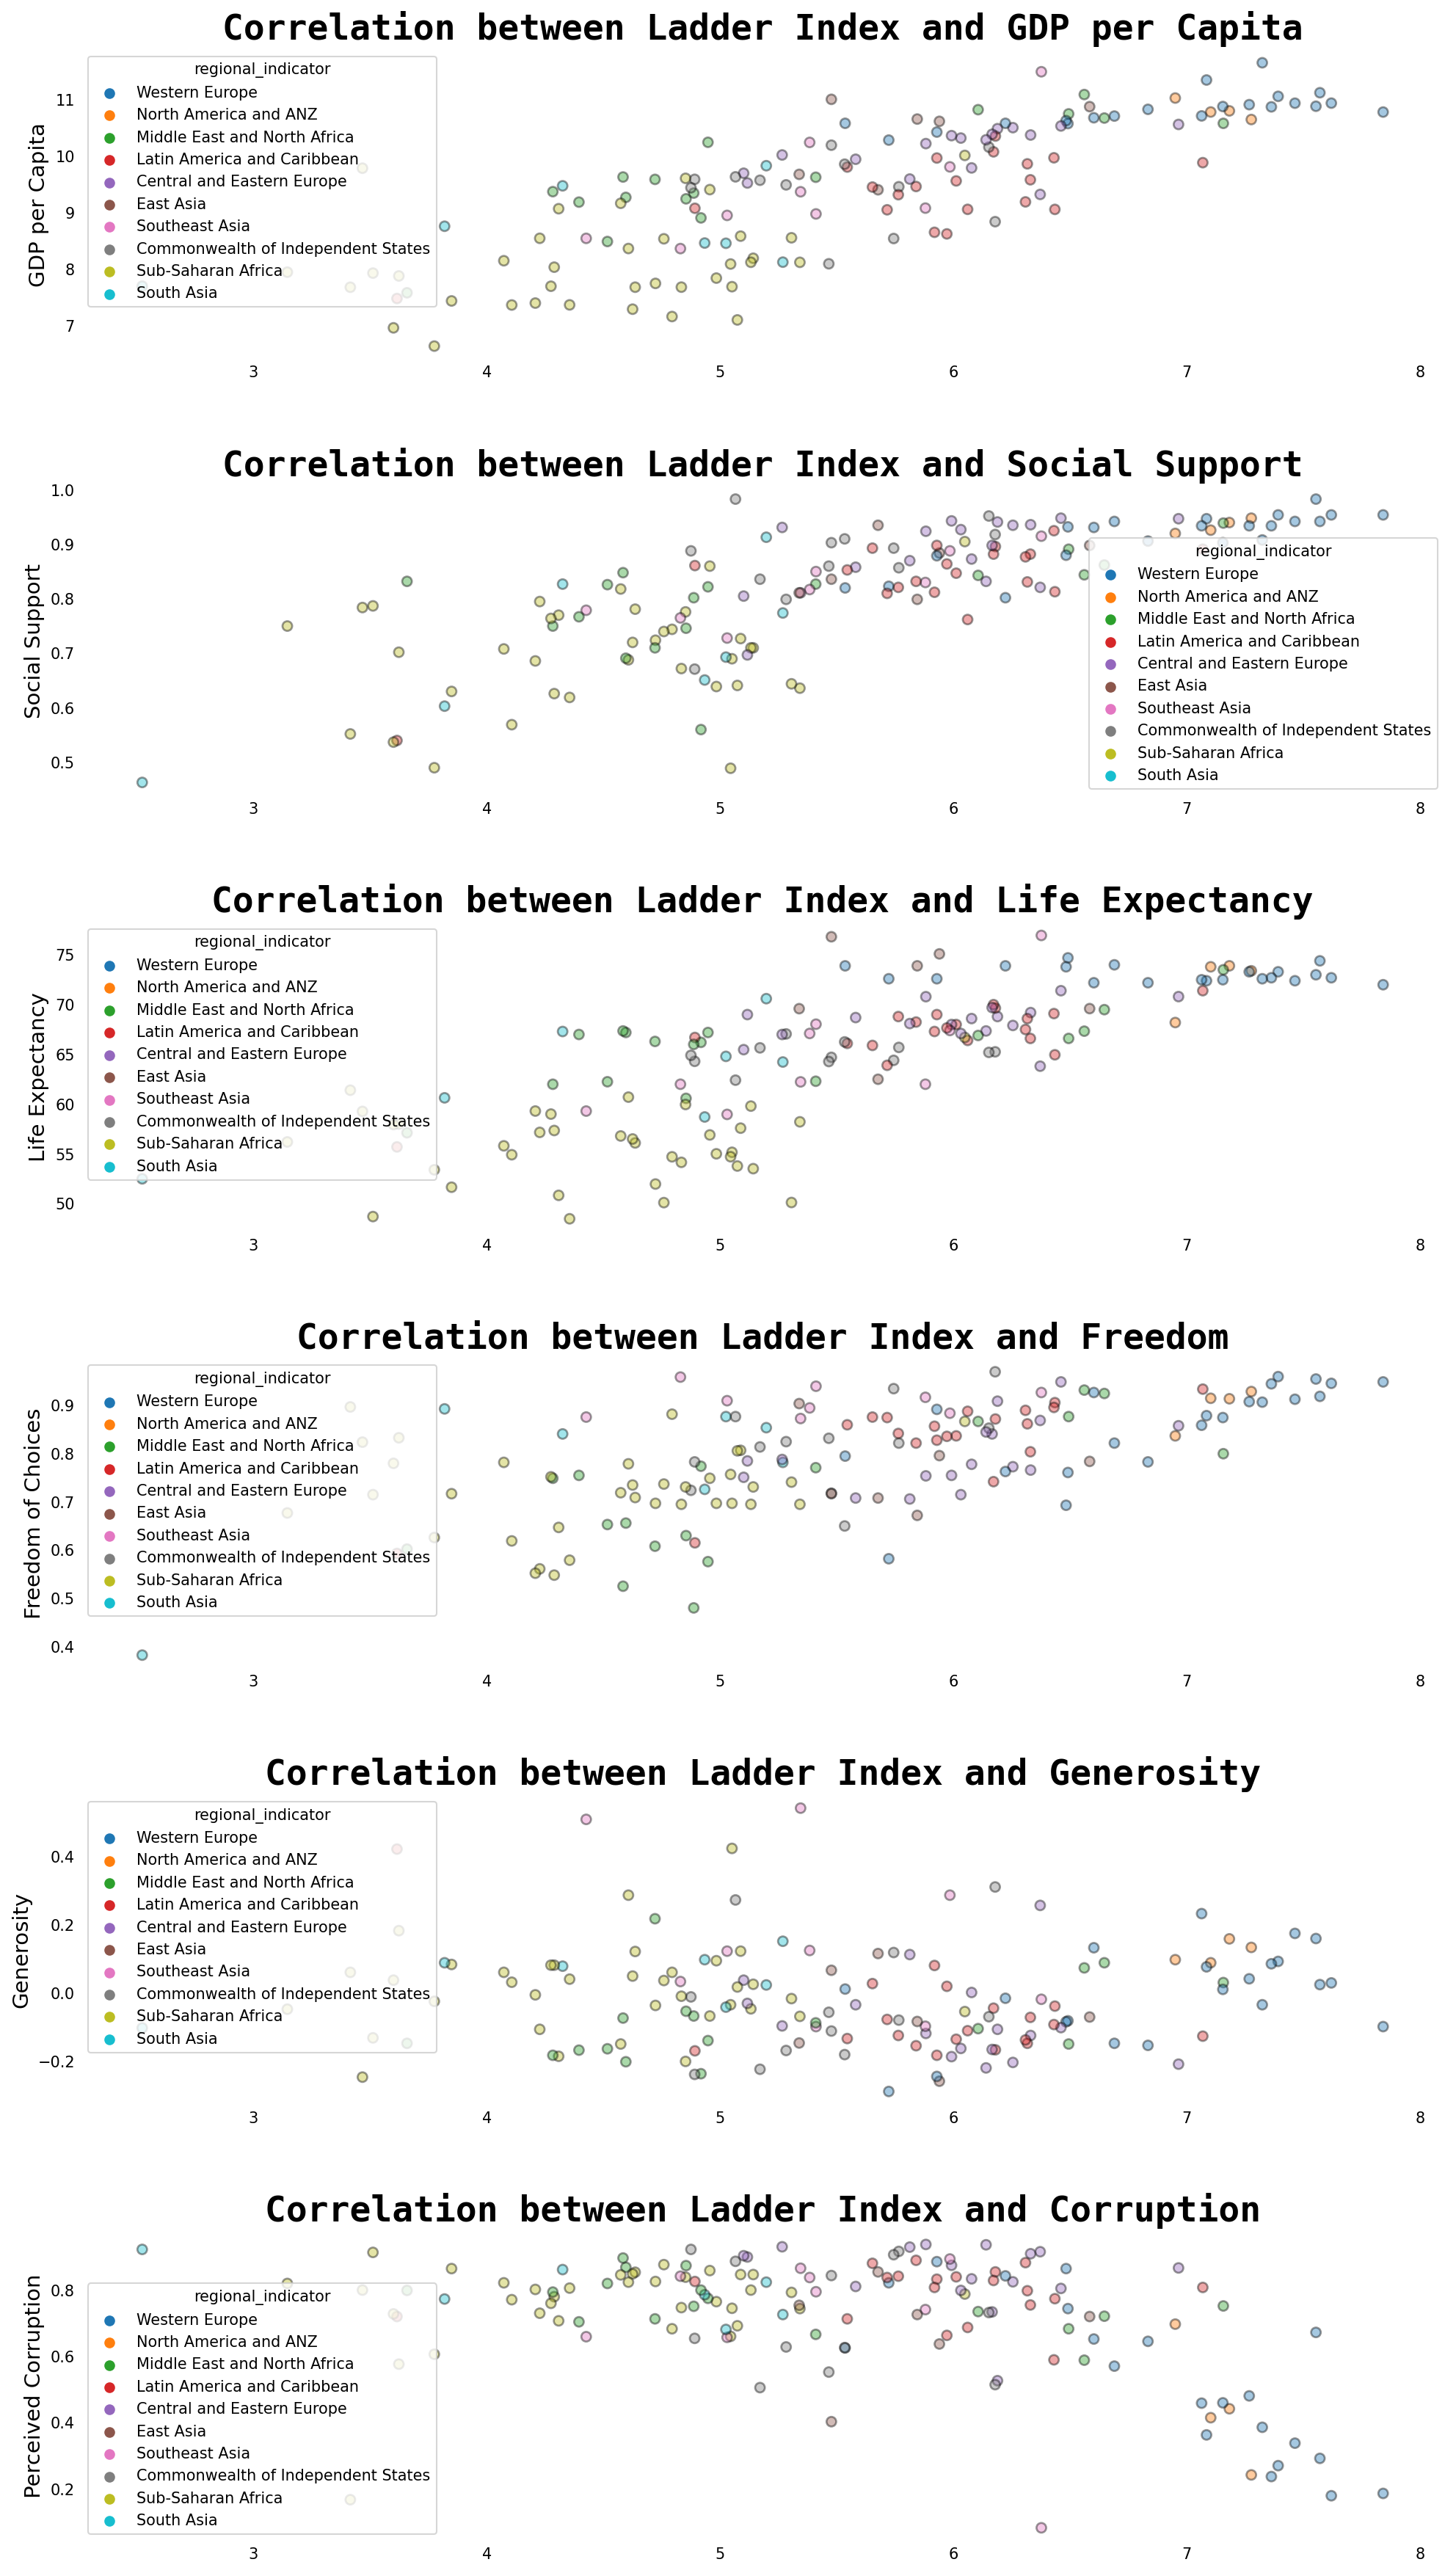

In [39]:
fig = plt.figure(figsize=(16,30), dpi=150) #sharex=True, 

gs = fig.add_gridspec(6, 1)
gs.update(wspace=0.05, hspace=0.4)
ax0 = fig.add_subplot(gs[0, 0])
ax0 = sns.scatterplot(data=curr_data, y=indicators[0], x=explanatory, s = 40, alpha=0.4, hue = curr_data["regional_indicator"],  ec='black', linewidth=1.3, legend=True)
ax1 = fig.add_subplot(gs[1, 0])
ax1 = sns.scatterplot(data=curr_data, y=indicators[1], x=explanatory,s = 40, alpha=0.4, hue = curr_data["regional_indicator"], ec='black', linewidth=1.3, legend=True)
ax2 = fig.add_subplot(gs[2, 0])
ax2 = sns.scatterplot(data=curr_data, y=indicators[2], x=explanatory, s = 40, alpha=0.4, hue = curr_data["regional_indicator"], ec='black', linewidth=1.3, legend=True)
ax3 = fig.add_subplot(gs[3, 0])
ax3 = sns.scatterplot(data=curr_data, y=indicators[3], x=explanatory, s = 40, alpha=0.4, hue = curr_data["regional_indicator"], ec='black', linewidth=1.3, legend=True)
ax4 = fig.add_subplot(gs[4, 0])
ax4 = sns.scatterplot(data=curr_data, y=indicators[4], x=explanatory, s = 40, alpha=0.4, hue = curr_data["regional_indicator"], ec='black', linewidth=1.3, legend=True)
ax5 = fig.add_subplot(gs[5, 0])
ax5 = sns.scatterplot(data=curr_data, y=indicators[5], x=explanatory, s = 40, alpha=0.4, hue = curr_data["regional_indicator"], ec='black', linewidth=1.3, legend=True)

ax0.set_title("Correlation between Ladder Index and GDP per Capita", fontsize=23,fontweight='bold', fontfamily='monospace')
ax1.set_title("Correlation between Ladder Index and Social Support", fontsize=23,fontweight='bold', fontfamily='monospace')
ax2.set_title("Correlation between Ladder Index and Life Expectancy", fontsize=23,fontweight='bold', fontfamily='monospace')
ax3.set_title("Correlation between Ladder Index and Freedom", fontsize=23,fontweight='bold', fontfamily='monospace')
ax4.set_title("Correlation between Ladder Index and Generosity", fontsize=23,fontweight='bold', fontfamily='monospace')
ax5.set_title("Correlation between Ladder Index and Corruption", fontsize=23,fontweight='bold', fontfamily='monospace')


for s in ['top','left','bottom','right']:
    ax0.spines[s].set_visible(False)
    ax1.spines[s].set_visible(False)
    ax2.spines[s].set_visible(False)
    ax3.spines[s].set_visible(False)
    ax4.spines[s].set_visible(False)
    ax5.spines[s].set_visible(False)

    ax0.set_xlabel("")
    ax0.set_ylabel("GDP per Capita", size=14)
    ax0.tick_params(axis=u'both', which=u'both',length=0)
    ax1.set_xlabel("")
    ax1.set_ylabel("Social Support", size=14)
    ax1.tick_params(axis=u'both', which=u'both',length=0)
    ax2.set_xlabel("")
    ax2.set_ylabel("Life Expectancy", size=14)
    ax2.tick_params(axis=u'both', which=u'both',length=0)
    ax3.set_xlabel("")
    ax3.set_ylabel("Freedom of Choices", size=14)
    ax3.tick_params(axis=u'both', which=u'both',length=0)
    ax4.set_xlabel("")
    ax4.set_ylabel("Generosity", size=14)
    ax4.tick_params(axis=u'both', which=u'both',length=0)
    ax5.set_xlabel("")
    ax5.set_ylabel("Perceived Corruption", size=14)
    ax5.tick_params(axis=u'both', which=u'both',length=0)

plt.show()

### Run a Pandas scatter matrix for cross correlations

array([[<AxesSubplot:xlabel='Ladder score', ylabel='Ladder score'>,
        <AxesSubplot:xlabel='Logged GDP per capita', ylabel='Ladder score'>,
        <AxesSubplot:xlabel='Social support', ylabel='Ladder score'>,
        <AxesSubplot:xlabel='Healthy life expectancy', ylabel='Ladder score'>,
        <AxesSubplot:xlabel='Freedom to make life choices', ylabel='Ladder score'>,
        <AxesSubplot:xlabel='Generosity', ylabel='Ladder score'>,
        <AxesSubplot:xlabel='Perceptions of corruption', ylabel='Ladder score'>],
       [<AxesSubplot:xlabel='Ladder score', ylabel='Logged GDP per capita'>,
        <AxesSubplot:xlabel='Logged GDP per capita', ylabel='Logged GDP per capita'>,
        <AxesSubplot:xlabel='Social support', ylabel='Logged GDP per capita'>,
        <AxesSubplot:xlabel='Healthy life expectancy', ylabel='Logged GDP per capita'>,
        <AxesSubplot:xlabel='Freedom to make life choices', ylabel='Logged GDP per capita'>,
        <AxesSubplot:xlabel='Generosity', ylabel='L

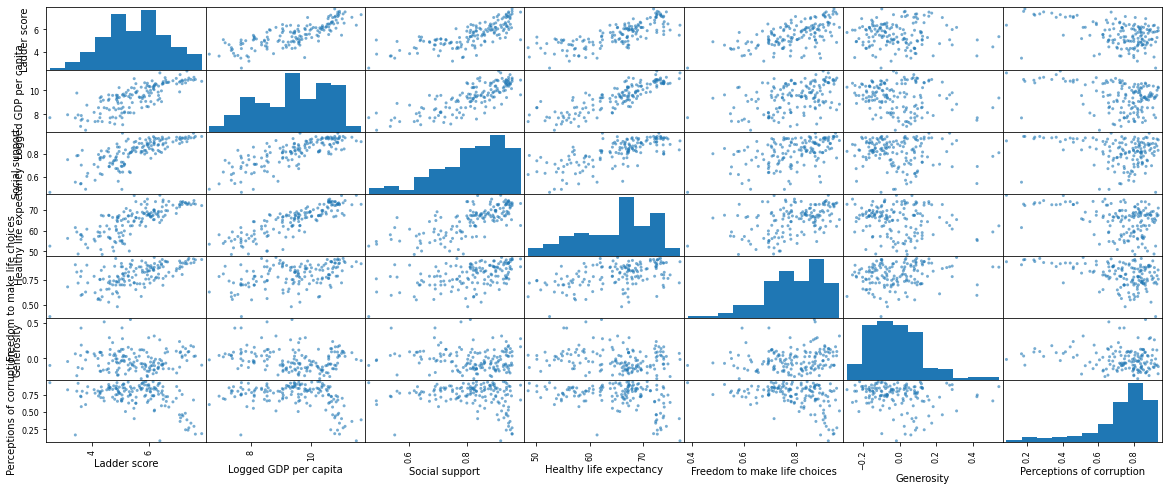

In [40]:
indicators = ["Ladder score","Logged GDP per capita","Social support","Healthy life expectancy","Freedom to make life choices","Generosity","Perceptions of corruption"] 
pd.plotting.scatter_matrix(curr_data.loc[:, indicators], alpha=0.6, figsize = (20,8), grid = True)


## Changes of Index levels over time (from 2007 to 2020)

In [41]:
data_start_year = hist_data.loc[:, ["Country name", "year"]].groupby("Country name").min("year")
data_end_year = hist_data.loc[:, ["Country name", "year"]].groupby("Country name").max("year")
data_start = hist_data.merge(data_start_year, on = ["Country name", "year"], how = "inner")
data_end = hist_data.merge(data_end_year, on = ["Country name", "year"], how = "inner")
m = data_start.merge(data_end, on = "Country name")

m["start_end_difference"] = m["Life Ladder_y"] - m["Life Ladder_x"]

### Largest period changes (top 10 increase and top 10 decrease from 2007 to 2020)

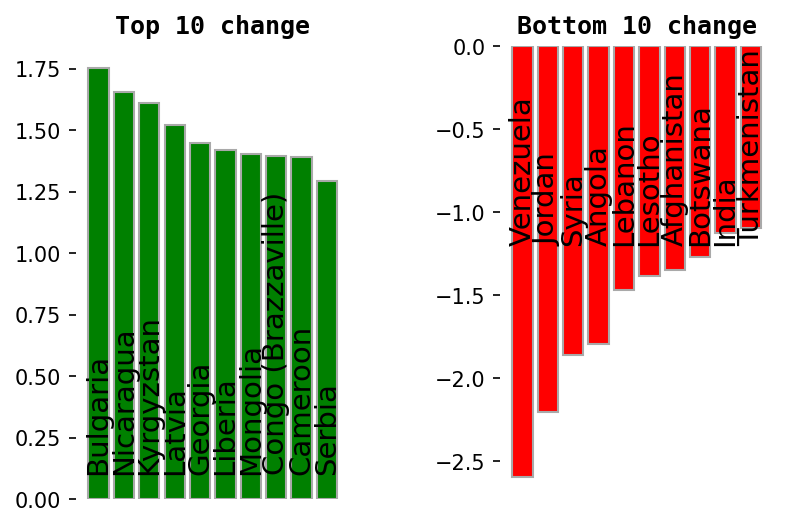

In [57]:
m.sort_values("start_end_difference", ascending = False, inplace = True)

fig = plt.figure(figsize=(6,4),dpi=150)
gs = fig.add_gridspec(1, 2)
gs.update(wspace=0.55, hspace=0.27)
ax0 = fig.add_subplot(gs[0, 0])

ax0.bar(m["Country name"].head(10), m["start_end_difference"].head(10), 
       edgecolor='darkgray',color="Green")

ax0.axes.get_xaxis().set_ticks([])
# ax0.axes.get_yaxis().set_ticks([])

for s in ['top','left', 'bottom', 'right']:
    ax0.spines[s].set_visible(False)

for i in range(0,10):
    ax0.annotate(list(m["Country name"].head(10))[i], 
                   xy=(i, 0.1), 
                   va = 'bottom', ha='center',fontweight='light',fontsize=14, color='black',rotation=90)

m.sort_values("start_end_difference", ascending = True, inplace = True)

ax1 = fig.add_subplot(gs[0, 1])

ax1.bar(m["Country name"].head(10), m["start_end_difference"].head(10), 
       edgecolor='darkgray',color="red")

ax1.axes.get_xaxis().set_ticks([])

for s in ['top','left', 'bottom', 'right']:
    ax1.spines[s].set_visible(False)

for i in range(0,10):
    ax1.annotate(list(m["Country name"].head(10))[i], 
                   xy=(i, -1.2), 
                   va = 'bottom', ha='center',fontweight='light',fontsize=14, color='black',rotation=90)

ax0.set_title("Top 10 change", fontsize=12, fontweight='bold', fontfamily='monospace')
ax1.set_title("Bottom 10 change", fontsize=12, fontweight='bold', fontfamily='monospace')

    
plt.show()

### Bulgaria is the country that saw the largest positive improvement in Laddes Scores. Venezuela saw the largest decrease.

## Largest oscillations of scores (Max/Min)

### In addition to looking at the score difference between the end and start of the report years, we want to look at max vs min score for each country for the period. The reason is that some countries might have experienced larger changes during the time period that would be missed if we only looked at the first and last year.

In [58]:
country_max = hist_data.loc[:, ["Country name", "Life Ladder"]].groupby("Country name").max()
country_min = hist_data.loc[:, ["Country name", "Life Ladder"]].groupby("Country name").min()
maxmin = country_max.merge(country_min, on = ["Country name"])
maxmin["changes"] = np.abs(maxmin["Life Ladder_x"] - maxmin["Life Ladder_y"])
changers = maxmin.sort_values("changes", ascending = False).head(10).index.values

In [59]:
hist_data["country_name"] = hist_data["Country name"]

hist_data.country_name.isin(changers).values

df = hist_data[hist_data.country_name.isin(changers) == True]

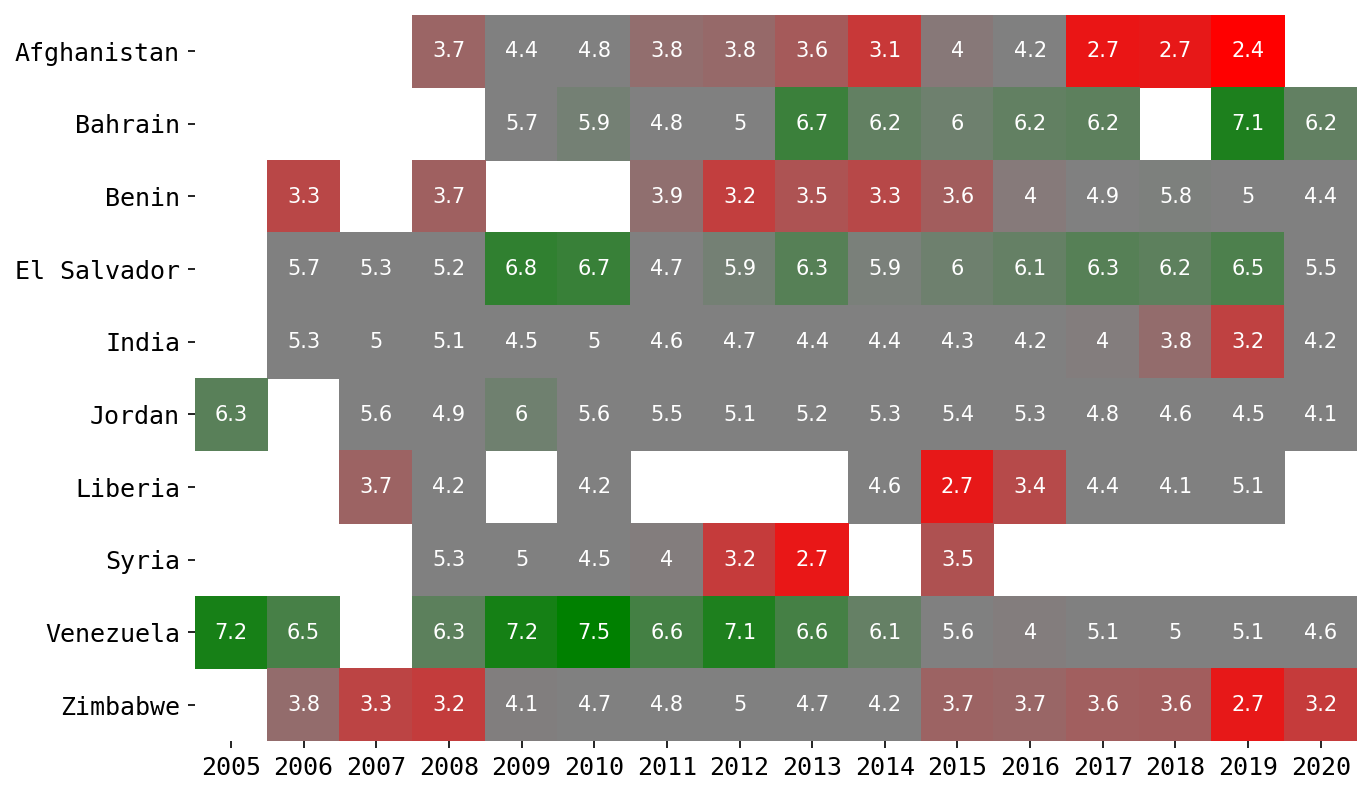

In [60]:
heatmap_data = df.pivot("country_name", "year", "Life Ladder")
fig, ax = plt.subplots(1, 1, figsize=(10, 15), dpi=150)#, facecolor=background_color)

colors = ['red','gray','gray','green']
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)

sns.heatmap(heatmap_data, square=True,cmap=cmap, cbar=False, ax=ax, annot=True)

ax.spines['top'].set_visible(False)
ax.set_xlabel("")
ax.set_ylabel("")
plt.yticks(rotation=0,fontfamily='monospace',size=12)
plt.xticks(rotation=0,fontfamily='monospace', size=12)

plt.show()

### Highlights:
- Afghanistan presents a very large drop of scores between 2016 (4.2) and 2019 (2.4) and it is now the lowest score of all countries.
- Venezuela's drop in scores from 2005 to 2020 is even more remarkable considering that the score in 2010 was higher than 2005. Therefore, while the drop between 2005 and 2020 was -2.6, the drop from 2010 to 2020 was -2.9
- Zimbabwe saw its scores improving between 2010 and 2013, and then dropping again afterwards to a minimum of 2.7 in 2019

## Classify countries based on all happiness indicators using a clustering algorithm

### Back to 2021 report - We will use all Happiness indicators to classify countries.

### Because we are using an unsupervised k-means algorithm, we need to pick the optimal number of clusters using the elbow method

In [61]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

features = ['Ladder score','Logged GDP per capita', 'Social support',
       'Healthy life expectancy', 'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption']
X = curr_data[features]

score = []
for i in range(1, 6):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 20, n_init = 10, random_state = 0)
    km.fit(X)
    score.append(km.inertia_)



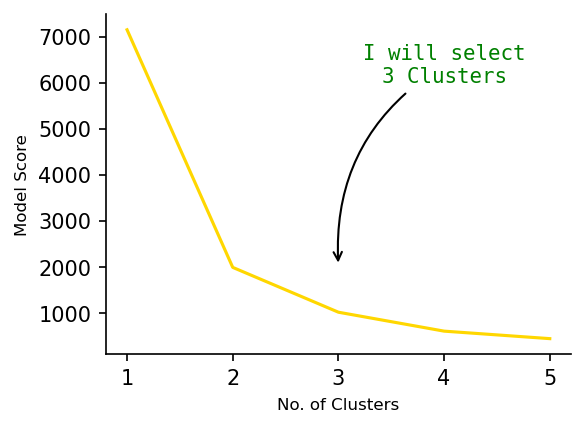

In [62]:
fig = plt.figure(figsize=(4,3),dpi=150)
gs = fig.add_gridspec(1, 1)
gs.update(wspace=0.05, hspace=0.27)
ax0 = fig.add_subplot(gs[0, 0])

for s in ['top','right']:
    ax0.spines[s].set_visible(False)

plt.annotate('I will select\n3 Clusters', xy=(3, 2000), xytext=(4, 6000),
             arrowprops=dict(facecolor='blue',arrowstyle="->",connectionstyle="arc3,rad=.3"), fontsize=10,fontfamily='monospace',ha='center', color="green")

    
plt.plot(range(1, 6), score,color='gold')
plt.xlabel('No. of Clusters',fontsize=8)
plt.ylabel('Model Score',fontsize=8)
plt.show()

### Analysis of each cluster:

In [63]:
kmod = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 20, n_init = 10, random_state = 0)
kmod.fit(X)

clusters = kmod.predict(X)
X.loc[:, 'cluster'] = clusters


/Users/celeste/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/celeste/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1783: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [64]:
display(X.loc[:, ["cluster", "Ladder score"]].groupby("cluster").count())


Ladder score
cluster              
0                  67
1                  43
2                  39

In [65]:
display(X.groupby("cluster").mean())
display(X.groupby("cluster").std())

Ladder score  Logged GDP per capita  Social support  \
cluster                                                        
0            5.595313               9.564791        0.842194   
1            4.386302               8.078837        0.686512   
2            6.689641              10.696615        0.908974   

         Healthy life expectancy  Freedom to make life choices  Generosity  \
cluster                                                                      
0                      66.278791                      0.805254   -0.043299   
1                      56.016791                      0.715814    0.034349   
2                      72.680154                      0.851692   -0.021308   

         Perceptions of corruption  
cluster                             
0                         0.785194  
1                         0.767070  
2                         0.584564

Ladder score  Logged GDP per capita  Social support  \
cluster                                                        
0            0.624269               0.657855        0.076042   
1            0.664065               0.732207        0.096571   
2            0.678067               0.373501        0.044822   

         Healthy life expectancy  Freedom to make life choices  Generosity  \
cluster                                                                      
0                       2.067372                      0.102600    0.152553   
1                       3.394839                      0.107607    0.156710   
2                       1.786063                      0.091701    0.128952   

         Perceptions of corruption  
cluster                             
0                         0.111464  
1                         0.122229  
2                         0.241675

### The clusters are significant and well separated

### Distribution of features by cluster:

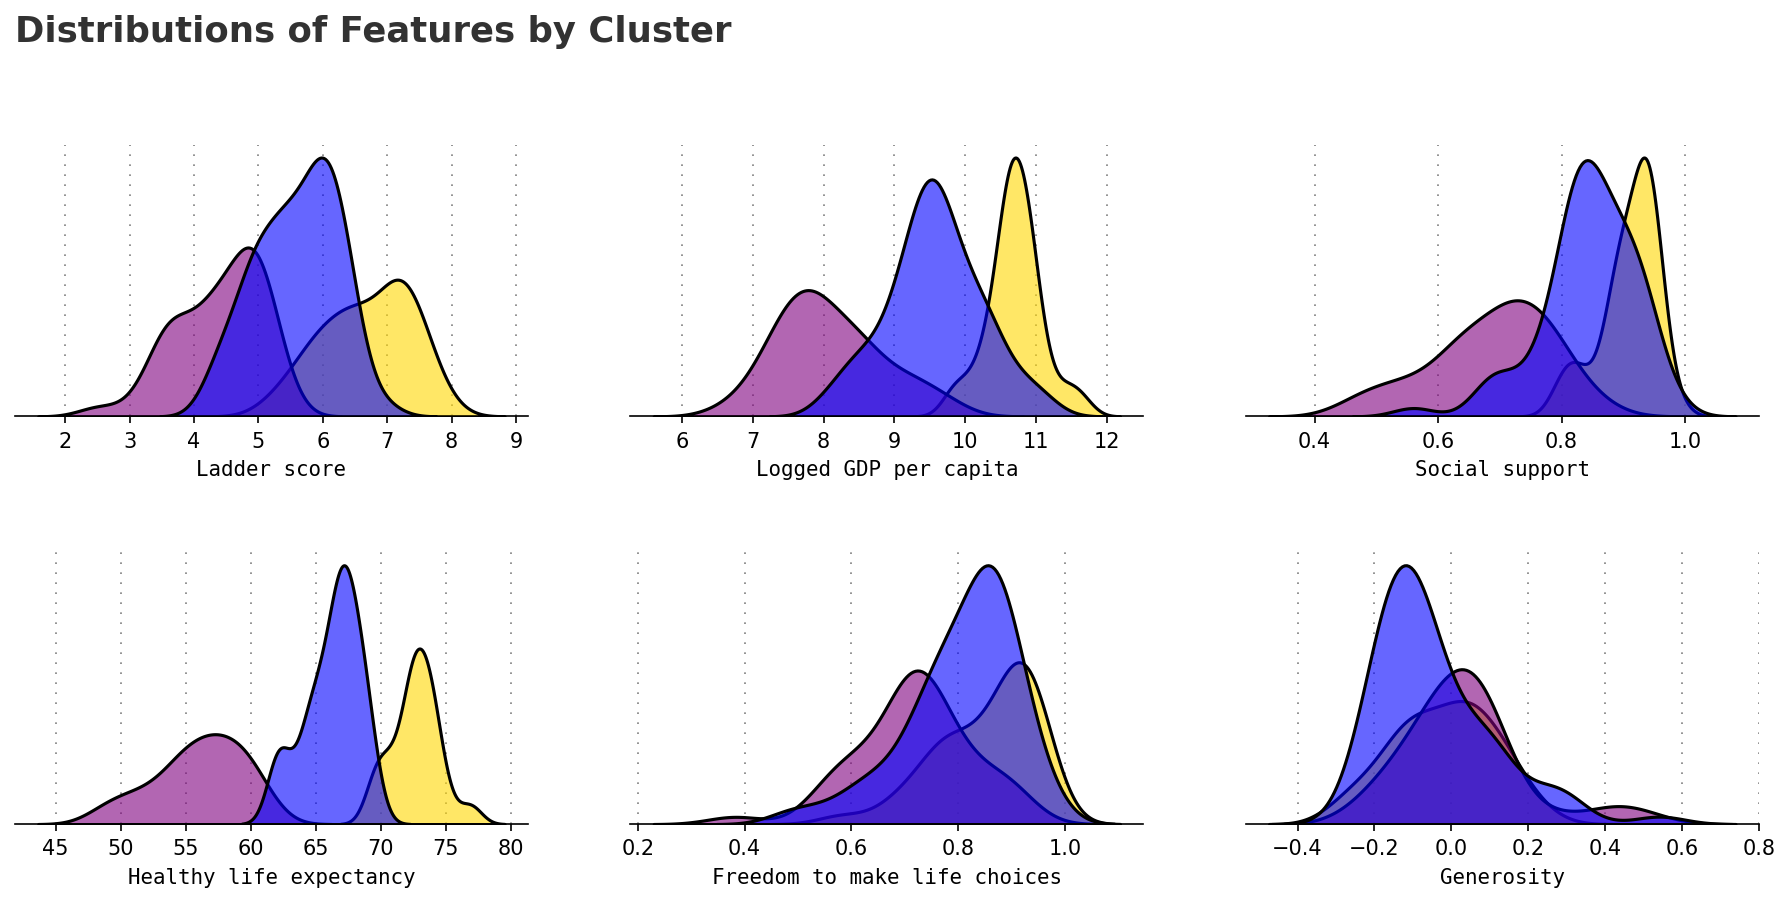

In [68]:
fig = plt.figure(figsize=(15, 6), dpi=150, facecolor="white")
gs = fig.add_gridspec(2, 3)
gs.update(wspace=0.2, hspace=0.5)

plot = 0
for row in range(0, 2):
    for col in range(0, 3):
        locals()["ax"+str(plot)] = fig.add_subplot(gs[row, col])
        locals()["ax"+str(plot)].tick_params(axis='y', left=False)
        locals()["ax"+str(plot)].get_yaxis().set_visible(False)
        locals()["ax"+str(plot)].set_axisbelow(True)
        for s in ["top","right","left"]:
            locals()["ax"+str(plot)].spines[s].set_visible(False)
        plot += 1

plot = 0

cluster_cols = {1: 'purple', 0:'blue', 2: 'gold'}

for variable in features[0:6]:
        sns.kdeplot(X[variable], hue=X['cluster'], ax=locals()["ax"+str(plot)], palette=cluster_cols,ec='black', shade=True, linewidth=1.5, alpha=0.6, zorder=3, legend=False)
        locals()["ax"+str(plot)].grid(which='major', axis='x', zorder=0, color='gray', linestyle=':', dashes=(1,5))
        locals()["ax"+str(plot)].set_xlabel(variable, fontfamily='monospace')
        plot += 1
        
Xstart, Xend = ax0.get_xlim()
Ystart, Yend = ax0.get_ylim()

ax0.text(Xstart, Yend+(Yend*0.38), 'Distributions of Features by Cluster', fontsize=17, fontweight='bold',color='#323232')

plt.show()

### Clusters in a Map Visualization

In [69]:
curr_data['cluster'] = clusters
curr_data['Cluster'] = curr_data['cluster'].astype("str")

fig = px.choropleth(curr_data, locations="Country name",
                    color="Cluster", 
                    locationmode='country names')  #px.colors.sequential.Plasma
fig.show()

### As evidenced by visualizing clusters in a map, the clustering algorithm is confirming the idea that happiest and least happy countries are geographically similar.

## Time series analysis

### Look at aggregated average happiness index per year

### Exclude 2005 as it has too few datapoints

In [70]:
agg_data = hist_data.loc[hist_data.year > 2005, :].groupby("year").mean()

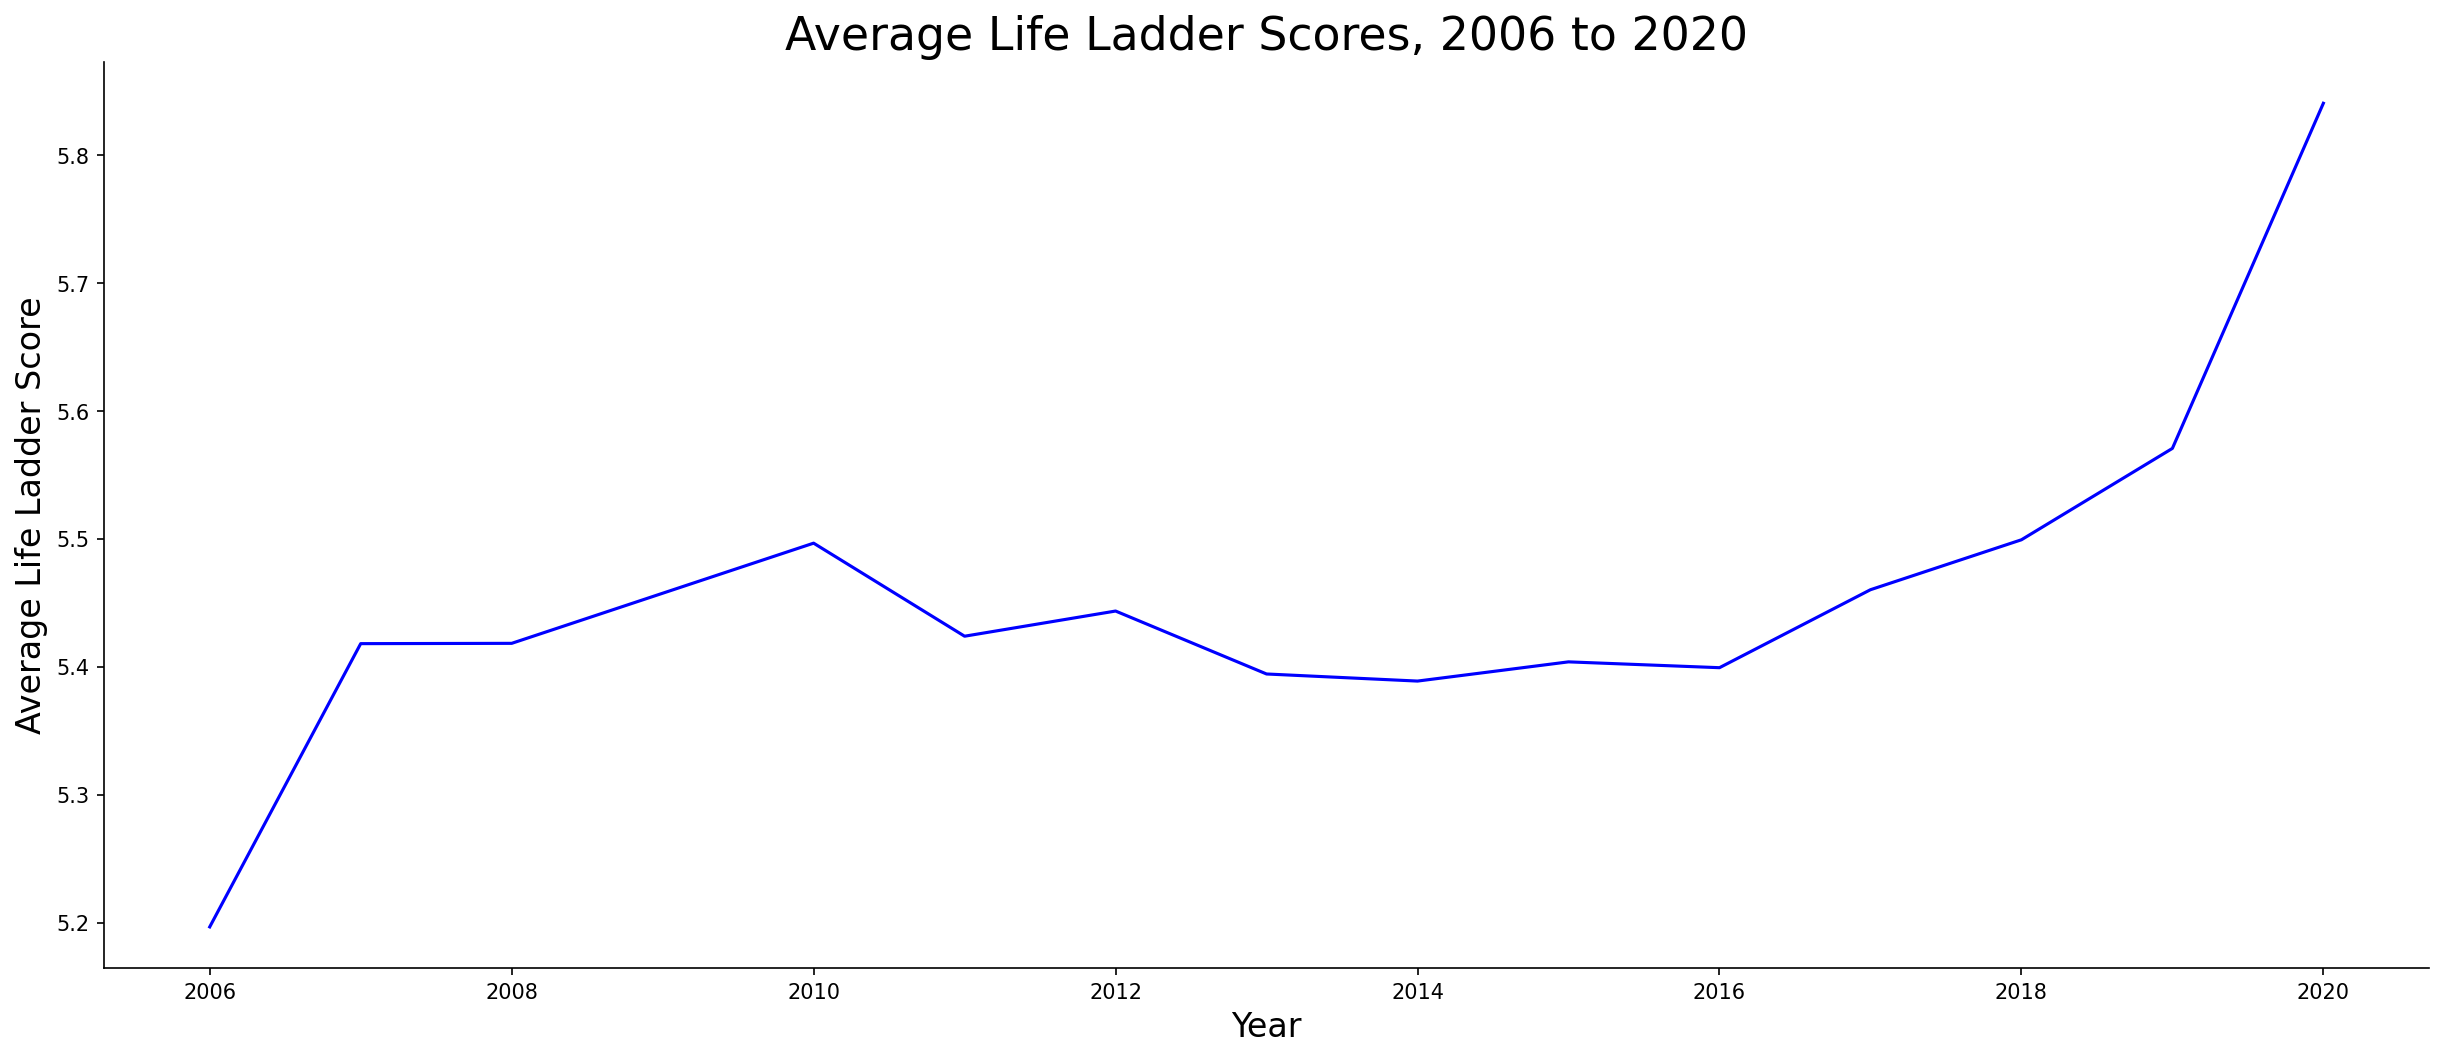

In [71]:
fig = plt.figure(figsize=(20,8),dpi=150)
gs = fig.add_gridspec(1, 1)
gs.update(wspace=0.05, hspace=0.27)
ax0 = fig.add_subplot(gs[0, 0])

for s in ['top','right']:
    ax0.spines[s].set_visible(False)
    
plt.plot(agg_data.index, agg_data["Life Ladder"], color='blue')
plt.xlabel('Year',fontsize=16)
plt.ylabel('Average Life Ladder Score',fontsize=16)
plt.title("Average Life Ladder Scores, 2006 to 2020",fontsize=22)
plt.show()

In [72]:
from fbprophet import Prophet

In [73]:
d = agg_data.loc[:, ["Life Ladder"]]  #, "Log GDP per capita"]]

d['year'] = pd.to_datetime(agg_data.index, format = "%Y")
d.rename(columns = {"year": "ds", "Life Ladder": "y"}, inplace = True)

In [74]:
m = Prophet(seasonality_mode='multiplicative')
# m.add_regressor('Log GDP per capita')
m.fit(d)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 11.


In [80]:
future = m.make_future_dataframe(periods=60, freq='MS')
# future['Log GDP per capita'] = np.ones(len(future))
fcst = m.predict(future)
fcst['year'] = fcst['ds'].dt.year
fcst['month'] = fcst['ds'].dt.month
fcst['day'] = fcst['ds'].dt.day
forecast = fcst.loc[(fcst.day == 1) & (fcst.month == 1) ,:]
forecast['is_future'] = np.zeros(len(forecast))
forecast.loc[forecast.year > 2020, "is_future"] = np.ones(len(forecast.loc[forecast.year > 2020, :]))
# forecast.head(2)

/Users/celeste/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/celeste/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



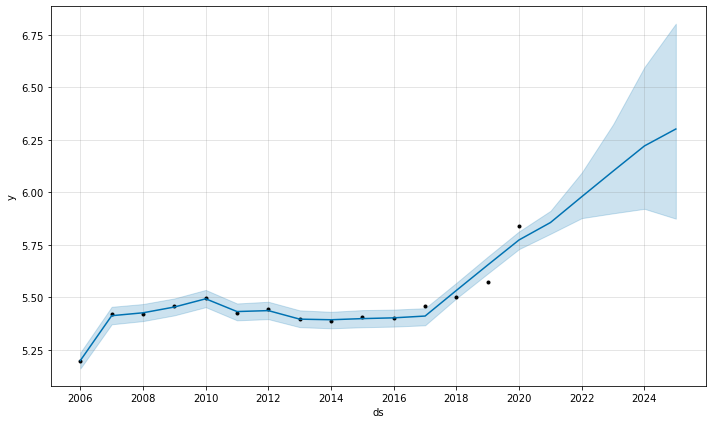

In [76]:
fig = m.plot(forecast)

### Plot without using Prophet's library:

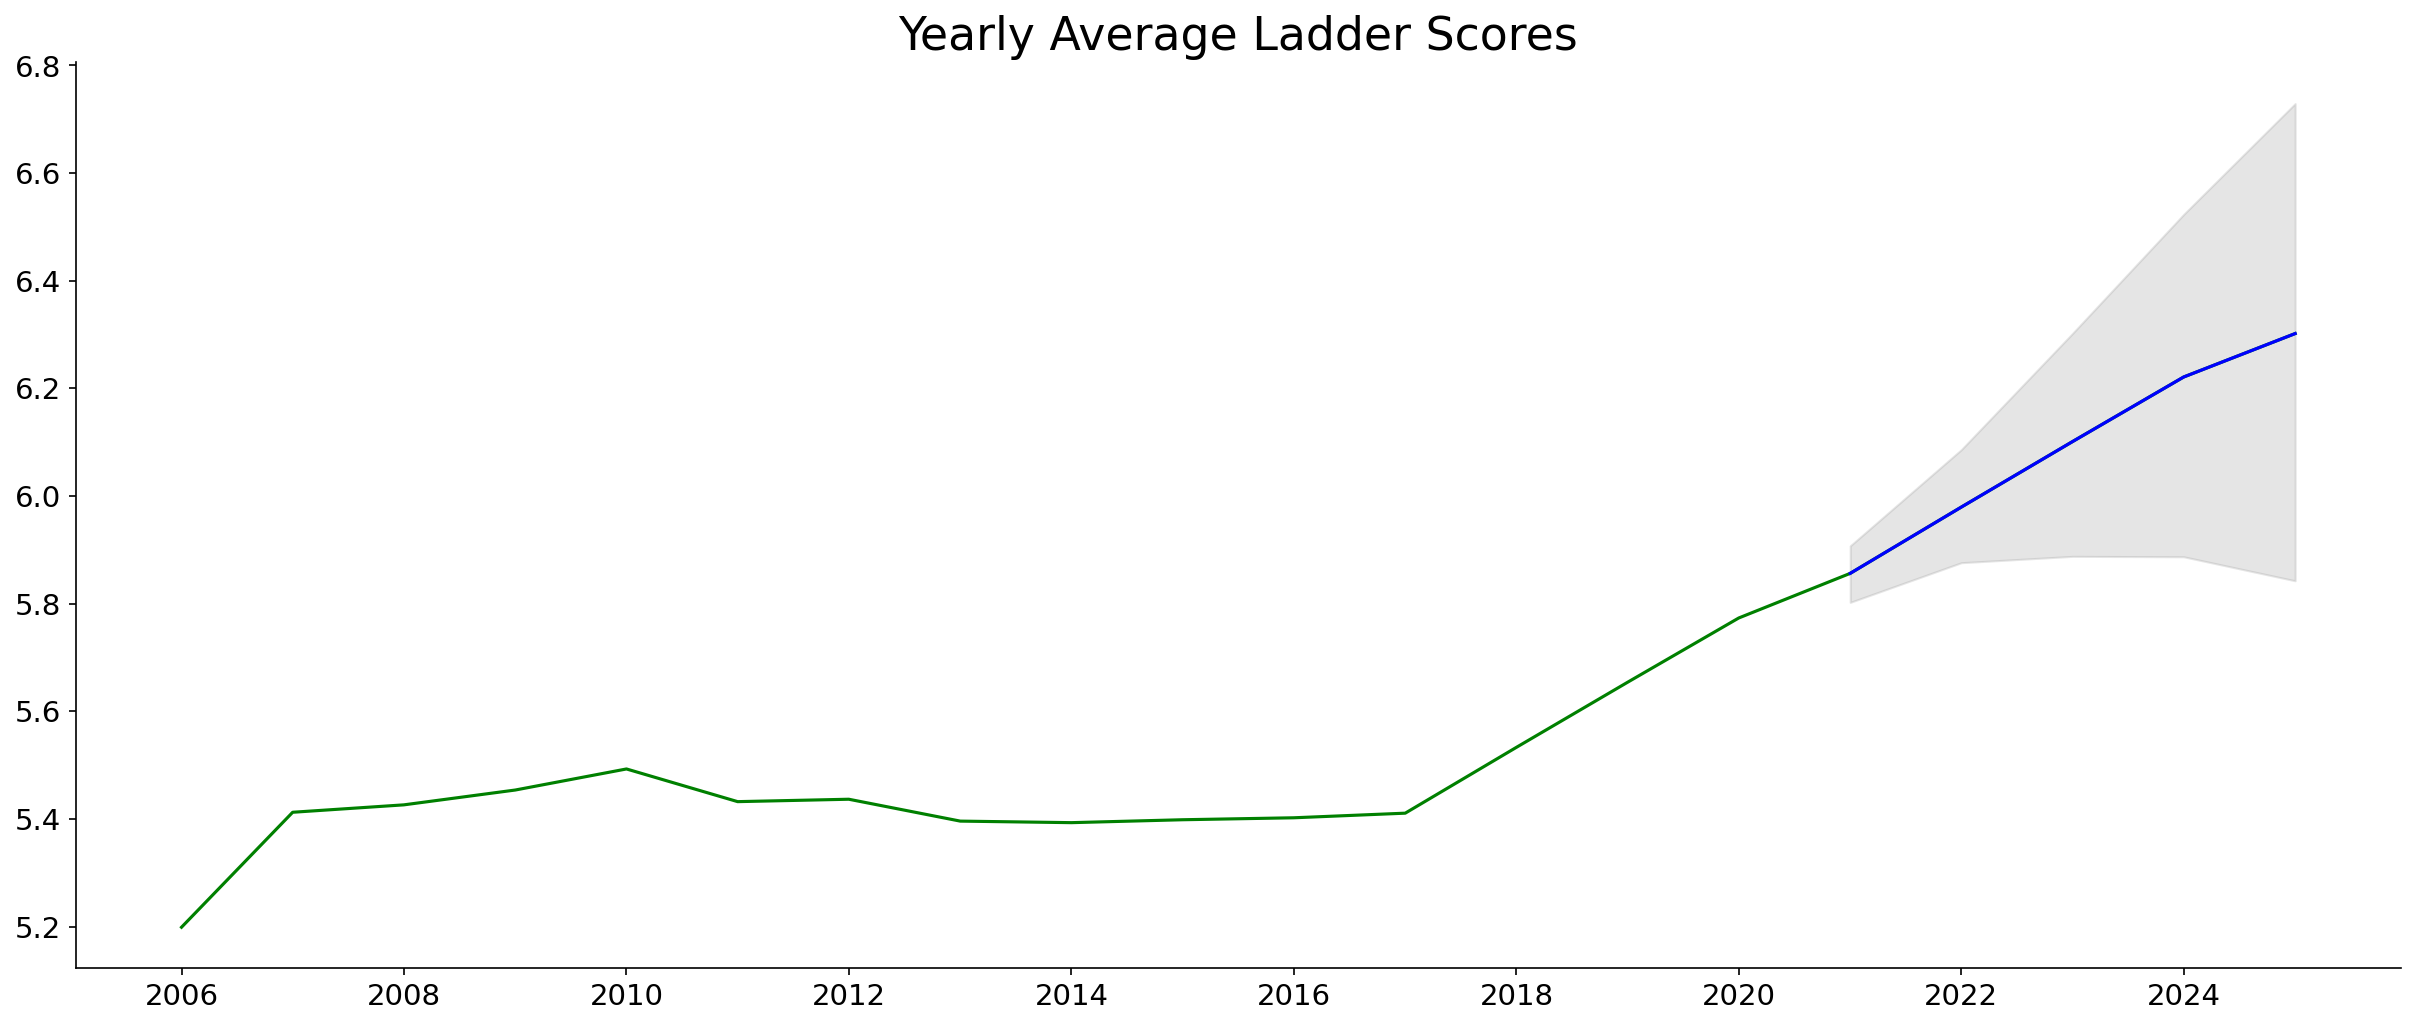

In [81]:
hist_color = 'green'
future_color = 'blue'
## Better formatted plot
fig = plt.figure(figsize=(20,8),dpi=150)
ax0 = fig.add_subplot(111)

for s in ['top','right']:
    ax0.spines[s].set_visible(False)

ax0.plot(forecast['ds'], forecast["yhat"], color=hist_color)
ax0.plot(forecast.loc[forecast.is_future == 1, 'ds'], forecast.loc[forecast.is_future == 1, "yhat"], color=future_color)
ax0.fill_between(forecast.loc[forecast.is_future == 1, 'ds'], 
                 forecast.loc[forecast.is_future == 1, 'yhat_lower'], 
                 forecast.loc[forecast.is_future == 1, 'yhat_upper'], color='grey', alpha=0.2)

ax0.tick_params(axis='both', which='major', labelsize=14)
ax0.tick_params(axis='both', which='minor', labelsize=14)

ax0.set_title('Yearly Average Ladder Scores', size=22)  #weight="bold"
plt.show()
